# Rice Leaf Disease Detection

## Problem Statement

 Task 1:-Prepare a complete data analysis report on the given data.

 Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

 Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.


## Domain Expertise
- The dataset includes 119 jpg images of rice leaves effected by different types of diseases.
- The classes are:-
- **Bacterial Leaf Blight**
-  Bacterial leaf blight of rice (BB) is a disease caused by the Gram-negative bacterium Xanthomonas oryzae pv.Bacterial leaf blight is often first noticed in fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.
- **Brown Spot**
- Brown spot is a fungal disease that can infect both seedlings and mature plants. The disease causes blight on seedlings, which are grown from heavily infected seeds, and can cause 10-58% seedling mortality.
- **Leaf Smut**
- Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice.The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves.The black spots are about 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.
- The class Leaf Smut contains 39 jpg images while rest all classes contain 40 jpg images.



## Importing Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop,SGD,Adagrad
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout

2024-04-12 00:55:32.015344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 00:55:32.015407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 00:55:32.015433: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 00:55:32.022746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 00:55:32.938371: W tensorflow/compiler/

In [2]:
input_shape = (150,150,3)
target_shape = (input_shape[0],input_shape[1])

## Loading the Data

In [3]:
data = tf.keras.utils.image_dataset_from_directory(directory="/home/xevator/Projects/Rice Leaf Disease Classification/Data",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None,
                                                  color_mode='rgb',
                                                  image_size=target_shape,
                                                  seed=1)

Found 119 files belonging to 3 classes.


2024-04-12 00:55:34.835817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 00:55:35.190483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 00:55:35.190540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 00:55:35.200331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 00:55:35.200396: I tensorflow/compile

In [4]:
# print class names

class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

 - The 3 Classes are - Bacterial leaf blight, Brown spot, Leaf smut.

In [5]:
# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through the dataset to count occurrences of each class label
for images, labels in data:
    for label in labels:
        class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Print the class counts
print(class_counts)


{0: 40, 1: 40, 2: 39}


## Image Visualisation

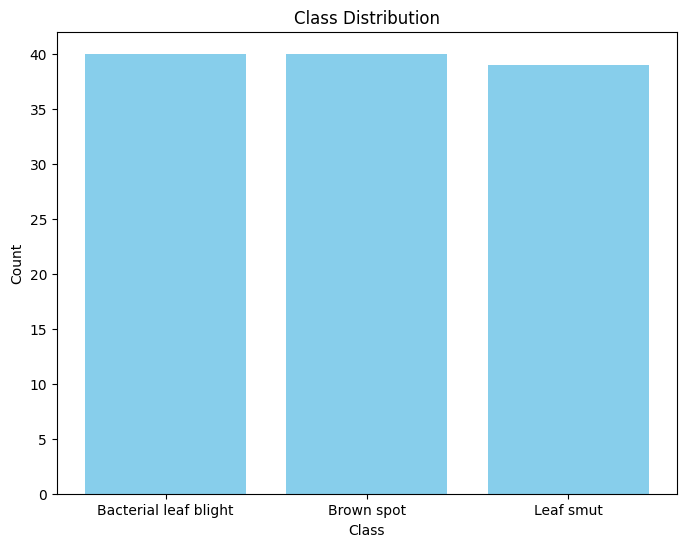

In [6]:
# Class names and counts
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
class_counts = [40, 40, 39]  # Replace with your actual counts

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

- From the graph we can clearly see that there are a total of 119 images. 
- 40 in Bacterial Leaf Blight and Brown Spot.
- 39 images available in Leaf Smut.

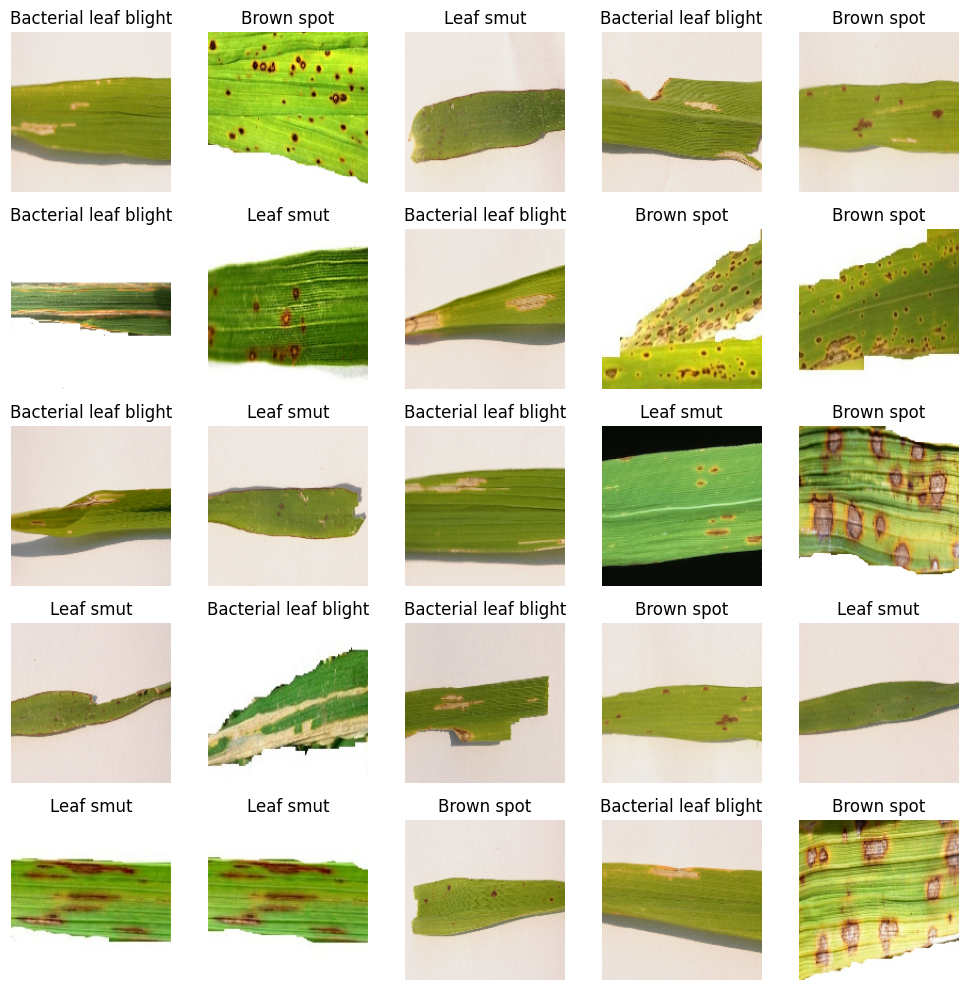

In [7]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

In [8]:
base_dir = '/home/xevator/Projects/Rice Leaf Disease Classification/Data'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_shape,
    color_mode="rgb",
    batch_size=32,
    subset='training',  # set as training data
    class_mode='categorical'
)

Found 108 images belonging to 3 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_shape,
    color_mode="rgb",
    batch_size=32,
    subset='validation',  # set as validation data
    class_mode='categorical'
)

Found 11 images belonging to 3 classes.


## Model Creation

In [258]:
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr*np.exp(-0.01)

In [259]:
scheduler(32,20)

19.800996674983363

In [260]:
callback = LearningRateScheduler(scheduler)
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [261]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [262]:
model = create_model(input_shape, num_classes=3)

In [264]:
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator,callbacks=[callback,early_stop],shuffle=True)

Epoch 1/100
4/4 [==============================] - 3s 493ms/step - loss: 1.0752 - accuracy: 0.4167 - val_loss: 1.0622 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 2s 401ms/step - loss: 1.0696 - accuracy: 0.4167 - val_loss: 1.0645 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 1s 298ms/step - loss: 1.0600 - accuracy: 0.4722 - val_loss: 1.0497 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 2s 334ms/step - loss: 1.0565 - accuracy: 0.3796 - val_loss: 1.0218 - val_accuracy: 0.6364 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 2s 322ms/step - loss: 1.0376 - accuracy: 0.4907 - val_loss: 1.0405 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 6/100
4/4 [==============================] - 2s 368ms/step - loss: 1.0423 - accuracy: 0.4352 - val_loss: 0.9968 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 7/100
4/4 [==============================] - 1

In [265]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.9229 - accuracy: 0.4545
Test accuracy: 0.4545


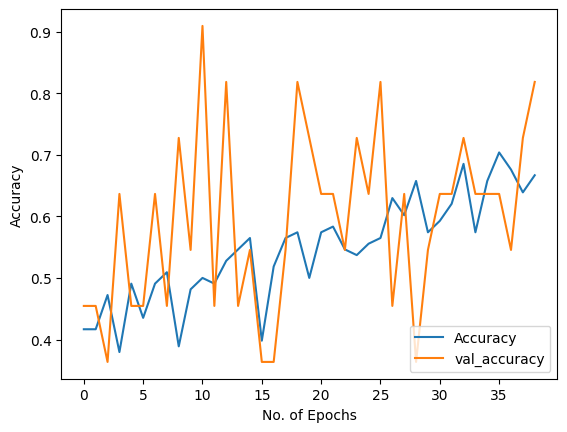

In [266]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

## Model Creation using different Optimizers 

### 1.Adam optimizer

In [267]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [268]:
model_da = create_model(input_shape, num_classes=3)

In [269]:
history = model_da.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator,callbacks=[callback,early_stop],shuffle=True)

Epoch 1/100
4/4 [==============================] - 5s 303ms/step - loss: 1.1004 - accuracy: 0.3796 - val_loss: 1.0922 - val_accuracy: 0.2727 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 1s 323ms/step - loss: 1.0983 - accuracy: 0.3704 - val_loss: 1.1052 - val_accuracy: 0.1818 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 1s 350ms/step - loss: 1.0927 - accuracy: 0.3889 - val_loss: 1.1016 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 1s 352ms/step - loss: 1.0870 - accuracy: 0.4167 - val_loss: 1.1067 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 2s 440ms/step - loss: 1.0970 - accuracy: 0.3889 - val_loss: 1.1045 - val_accuracy: 0.1818 - lr: 1.0000e-04
Epoch 6/100
4/4 [==============================] - 1s 281ms/step - loss: 1.0845 - accuracy: 0.4630 - val_loss: 1.0908 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 7/100
4/4 [==============================] - 1

: 

In [ ]:
test_loss, test_accuracy = model_da.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 280ms/step - loss: 0.5690 - accuracy: 0.8182
Test accuracy: 0.8182


### Model shows an accuracy of 87.50 % for Adam Optimizer.

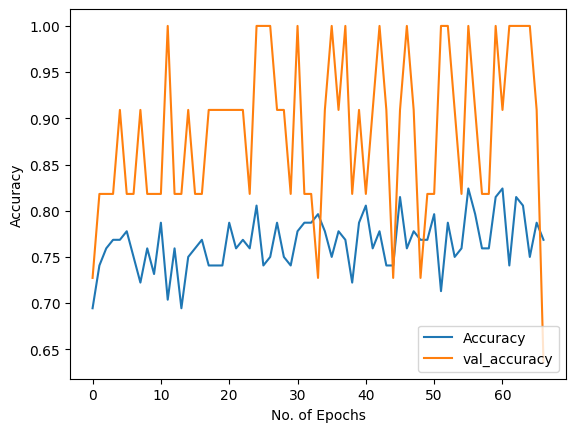

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### 2.RMSProp Optimizer

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_rms = create_model(input_shape, num_classes=3)

In [ ]:
history = model_rms.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator,callbacks=[callback,early_stop],shuffle=True)

Epoch 1/100
4/4 [==============================] - 2s 202ms/step - loss: 1.1083 - accuracy: 0.2685 - val_loss: 1.0994 - val_accuracy: 0.1818 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 1s 291ms/step - loss: 1.0960 - accuracy: 0.3056 - val_loss: 1.0942 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 1s 295ms/step - loss: 1.0958 - accuracy: 0.3426 - val_loss: 1.0905 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 1s 415ms/step - loss: 1.0983 - accuracy: 0.3519 - val_loss: 1.0903 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 1s 281ms/step - loss: 1.0981 - accuracy: 0.3611 - val_loss: 1.1001 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 6/100
4/4 [==============================] - 1s 295ms/step - loss: 1.0969 - accuracy: 0.3333 - val_loss: 1.0914 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 7/100
4/4 [==============================] - 1

In [ ]:
test_loss, test_accuracy = model_rms.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 175ms/step - loss: 0.8112 - accuracy: 0.6364
Test accuracy: 0.6364


### Model shows an accuracy of 50% for RMSProp Optimizer 

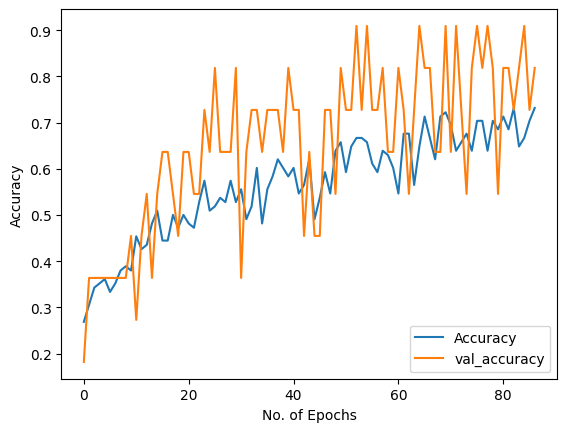

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### 3.SGD Optimizer

In [135]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [136]:
model_sgd = create_model(input_shape, num_classes=3)

In [137]:
history = model_sgd.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator,callbacks=[callback,early_stop])

Epoch 1/100
4/4 [==============================] - 2s 231ms/step - loss: 1.1021 - accuracy: 0.3333 - val_loss: 1.0895 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 1s 302ms/step - loss: 1.0993 - accuracy: 0.3519 - val_loss: 1.0941 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 1s 286ms/step - loss: 1.0999 - accuracy: 0.3056 - val_loss: 1.0947 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 1s 423ms/step - loss: 1.0995 - accuracy: 0.3426 - val_loss: 1.0905 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 1s 279ms/step - loss: 1.1014 - accuracy: 0.2870 - val_loss: 1.0917 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 6/100
4/4 [==============================] - 1s 329ms/step - loss: 1.0999 - accuracy: 0.3611 - val_loss: 1.0935 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 7/100
4/4 [==============================] - 1

In [235]:
test_loss, test_accuracy = model_sgd.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 162ms/step - loss: 1.0954 - accuracy: 0.3636
Test accuracy: 0.3636


### Model shows an accuracy of 29% for SGD Optimizer.

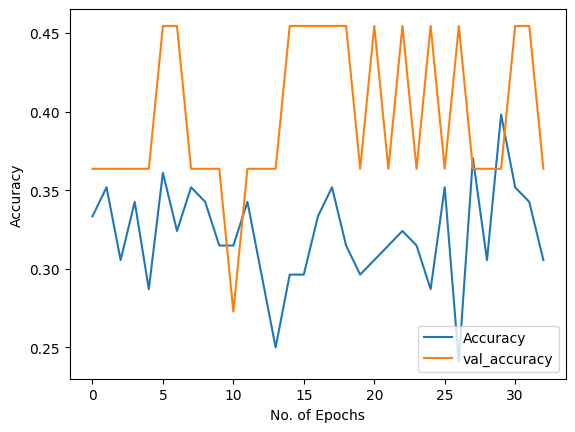

In [139]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### 4.ADAGRAD Optimizer

In [140]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adagrad(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [141]:
model_adagrad = create_model(input_shape, num_classes=3)

In [142]:
history = model_adagrad.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator,callbacks=[callback,early_stop])

Epoch 1/100
4/4 [==============================] - 2s 235ms/step - loss: 1.1016 - accuracy: 0.3426 - val_loss: 1.0964 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 1s 317ms/step - loss: 1.0983 - accuracy: 0.3333 - val_loss: 1.0994 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 1s 313ms/step - loss: 1.0955 - accuracy: 0.3426 - val_loss: 1.1041 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 1s 293ms/step - loss: 1.0955 - accuracy: 0.3611 - val_loss: 1.1050 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 1s 294ms/step - loss: 1.0952 - accuracy: 0.3333 - val_loss: 1.1015 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 6/100
4/4 [==============================] - 1s 361ms/step - loss: 1.1021 - accuracy: 0.3333 - val_loss: 1.0972 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 7/100
4/4 [==============================] - 1

In [231]:
test_loss, test_accuracy = model_adagrad.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 192ms/step - loss: 1.0988 - accuracy: 0.3636
Test accuracy: 0.3636


### Model shows an accuracy of 29% for ADAGRAD  Optimizer

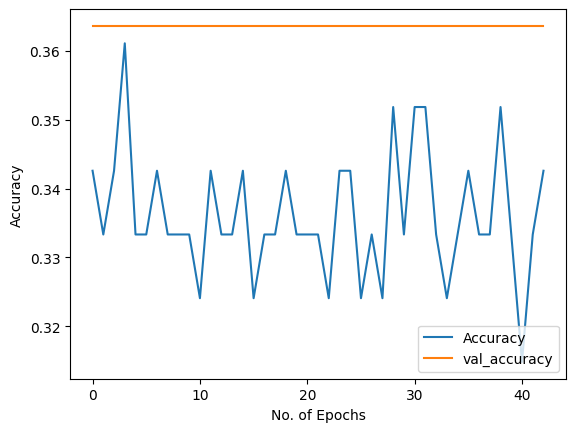

In [144]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### ACCURACY OF THE  MODEL WITH DIFFERENT OPTIMIZERS
- 1.Adam optimizer shows an accuracy of 87.50.
- 2.RMSProp Optimizer shows an accuracy of 50.
- 3.SGD Optimizer shows an accuracy of 29.
- 4.ADAGRAD Optimizer shows an accuracy of 29.
- From all of the Optimizer, **Adam Optimizer** shows the most Accuracy of **87.50%**.

In [210]:
conv_base_vgg=VGG16(weights='imagenet',
               include_top=False,
               input_shape=input_shape)

In [211]:
model=Sequential()
model.add(conv_base_vgg)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [212]:
conv_base_vgg.trainable=False

In [213]:
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [214]:
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator,callbacks=[callback,early_stop])

Epoch 1/100
4/4 [==============================] - 3s 507ms/step - loss: 1.1896 - accuracy: 0.2963 - val_loss: 1.0394 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 1s 317ms/step - loss: 1.1219 - accuracy: 0.3704 - val_loss: 1.0391 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 1s 369ms/step - loss: 1.0974 - accuracy: 0.3704 - val_loss: 1.0688 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 1s 337ms/step - loss: 1.0711 - accuracy: 0.3981 - val_loss: 1.0502 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 1s 280ms/step - loss: 1.0225 - accuracy: 0.5093 - val_loss: 1.0450 - val_accuracy: 0.4545 - lr: 1.0000e-04
Epoch 6/100
4/4 [==============================] - 1s 407ms/step - loss: 1.0386 - accuracy: 0.5093 - val_loss: 1.0135 - val_accuracy: 0.6364 - lr: 1.0000e-04
Epoch 7/100
4/4 [==============================] - 1

In [221]:
test_samp = validation_generator.next()
X_test = test_samp[0]
y_test = test_samp[1]

In [222]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 37ms/step - loss: 0.4358 - accuracy: 0.9091
Test accuracy: 0.9091


## Predicting the Disease Class by using Adam Optimizer

In [223]:
# make prediction for X_test
y_prediction = model.predict(X_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 0s 18ms/step


In [224]:
# get the predicted class for each sample
predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes,np.argmax(y_test,axis=1))

[0 2 1 2 1 2 1 0 0 1 1] [0 2 0 2 1 2 1 0 0 1 1]


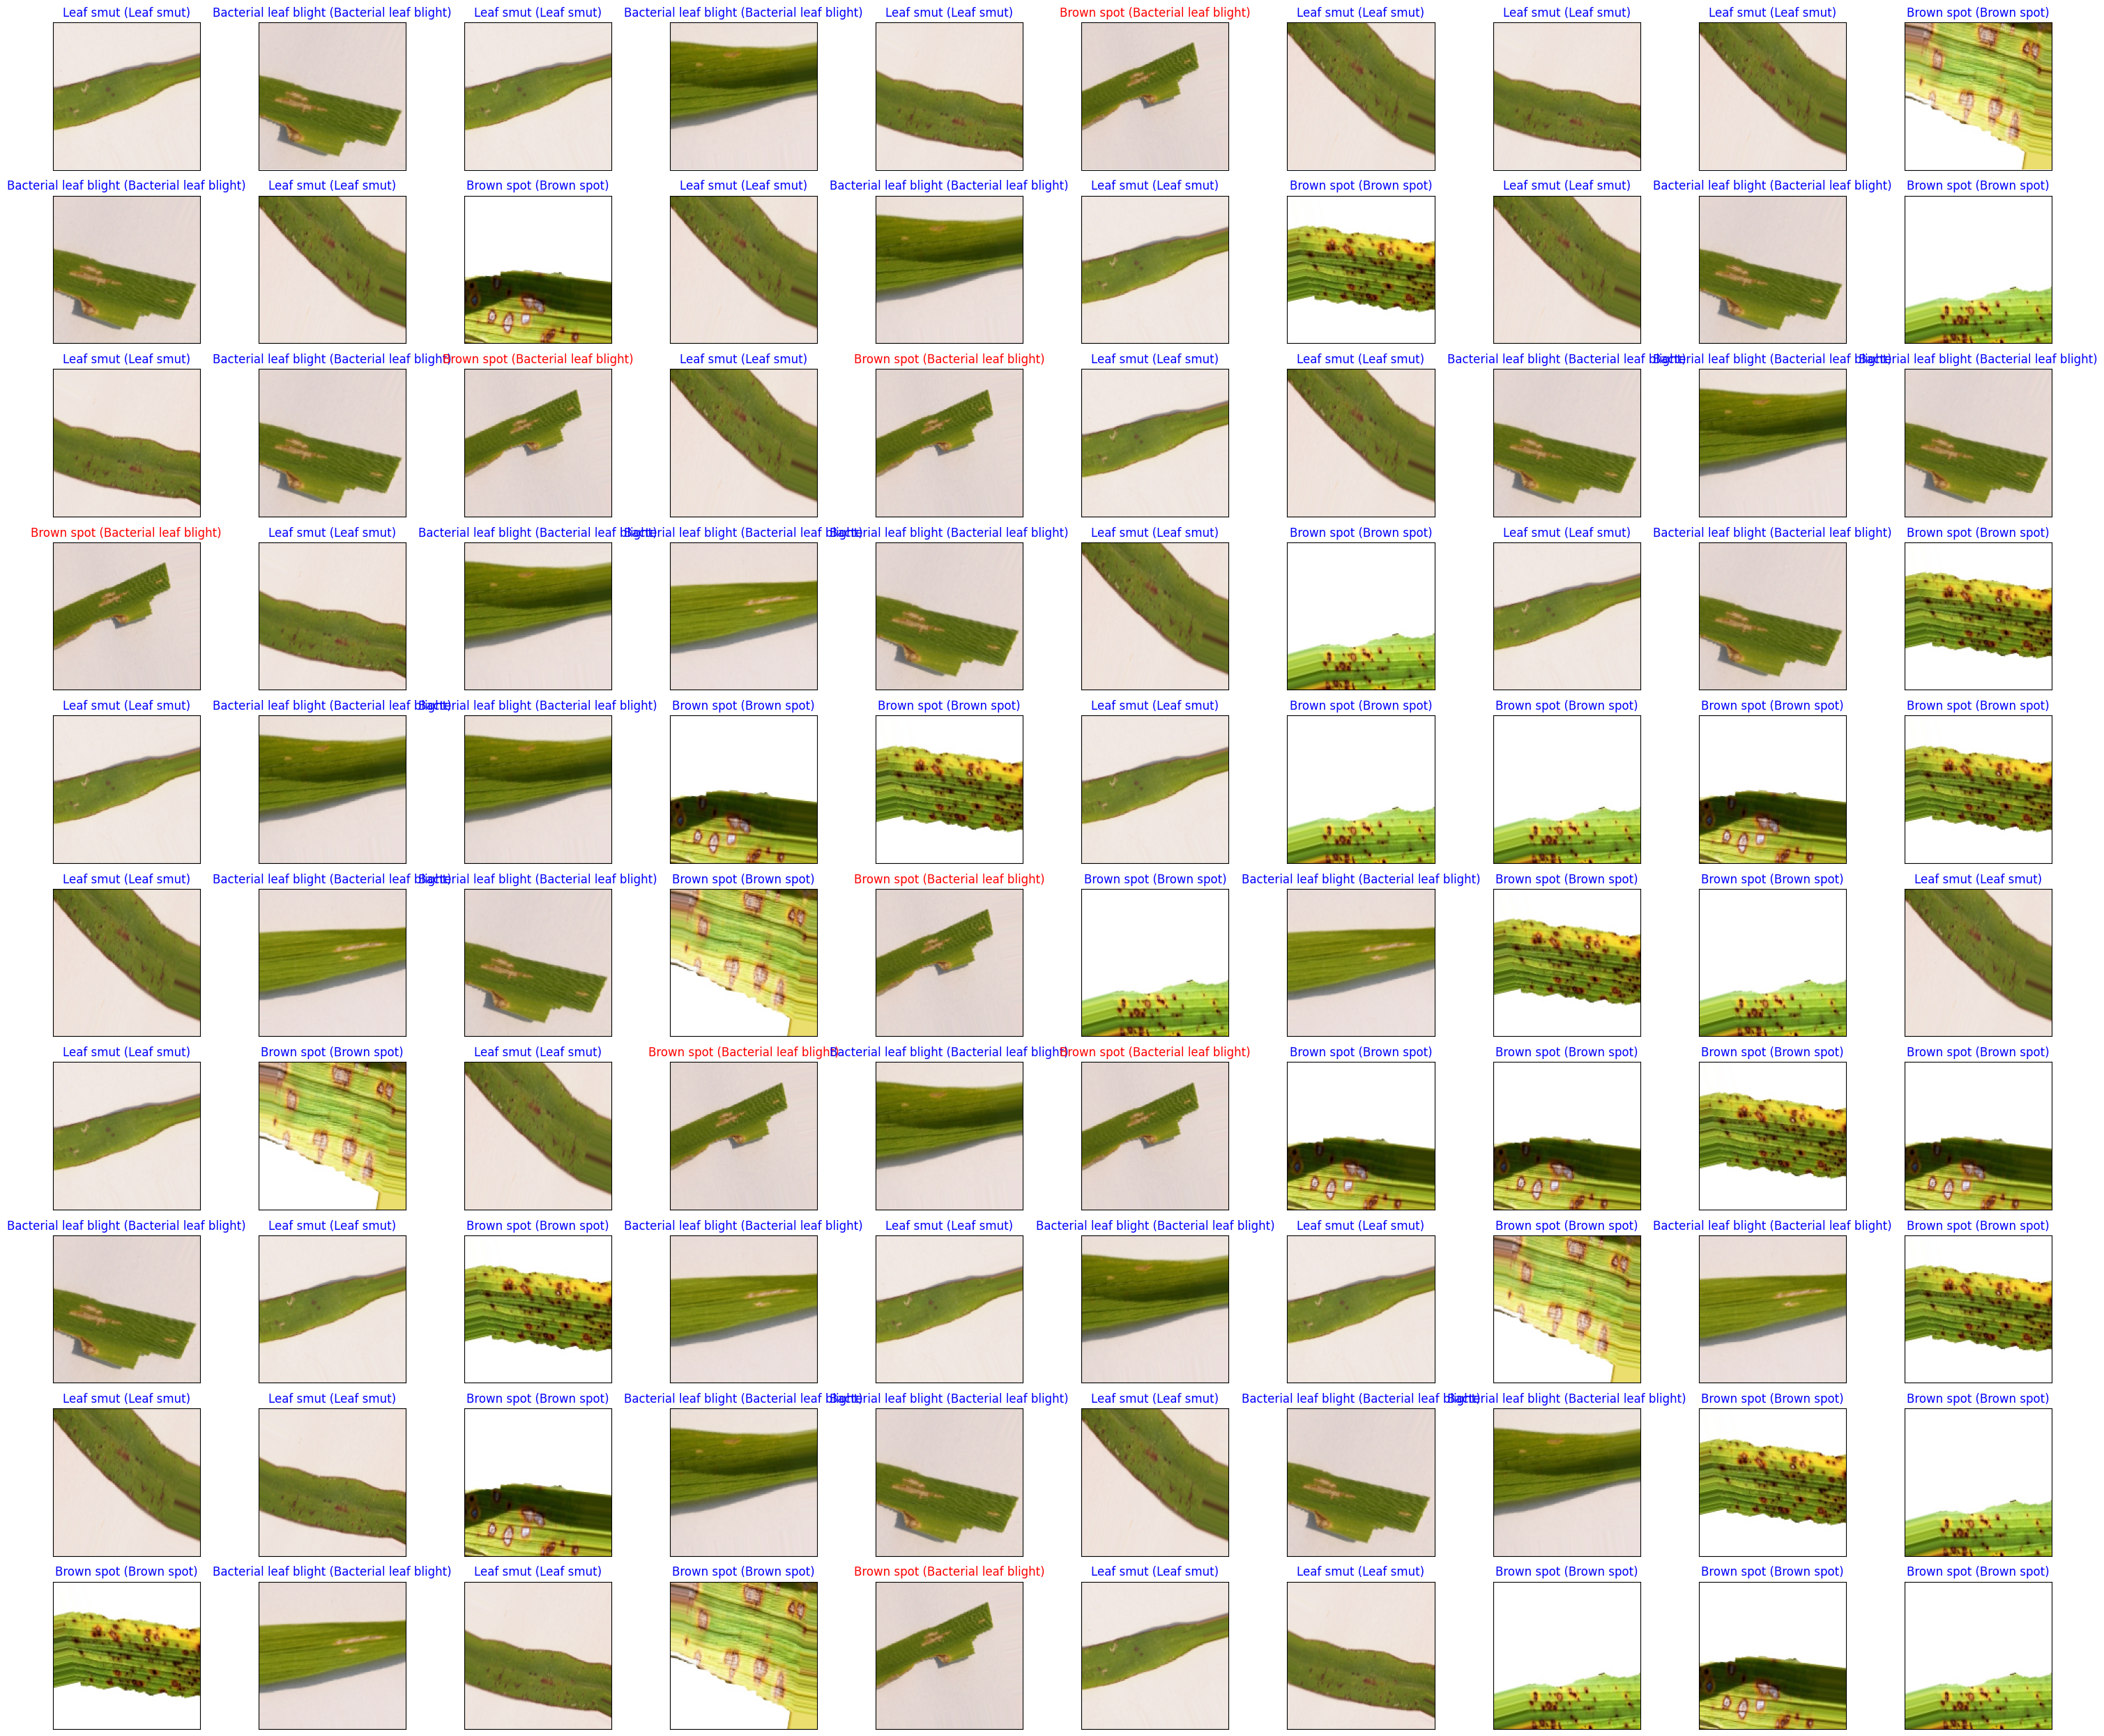

In [225]:
# Assuming you have 'y_hat' for predictions and 'y_test' for ground truth
# Assuming 'leaf_class' is a list of class labels

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=100, replace=True)):
    ax = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_hat' contains the model predictions
    pred_idx = np.argmax(y_prediction[idx])

    true_idx = np.argmax(y_test[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

Save the model


In [ ]:
# Save model architecture as JSON
model_json = model_da.to_json()
with open("/content/drive/My Drive/RiceLeafClass/model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model_da.save_weights("/content/drive/My Drive/RiceLeafClass/model_weights.h5")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import model_from_json
from keras.preprocessing import image

# Load model architecture from JSON
with open('/content/drive/My Drive/RiceLeafClass/model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load model weights
loaded_model.load_weights("/content/drive/My Drive/RiceLeafClass/model_weights.h5")

## Predicting the Diseases using the Image From the PC

In [ ]:
# Define a dictionary mapping class indices to class labels
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2: 'Leaf smut'}  # Update with your class labels

def predict_image_from_path(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Preprocess image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, (224, 224))  # adjust input size according to your model's input shape
    img = img.astype('float32')
    img /= 255.0  # normalize the pixel values
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = loaded_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

    # Print prediction
    print("Predicted class:", predicted_class_name)

# Example usage: Predict using a training image
image_path = "/content/drive/My Drive/RiceLeafClass/Leaf smut/DSC_0317.JPG"  # Update with the path to your training image
predict_image_from_path(image_path)

## Predict the diseases using Images from Google using its URL

In [ ]:
import urllib
# Define a dictionary mapping class indices to class labels
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2:'Leaf smut' }


def predict_image_from_url():
    # Prompt user to enter image URL
    image_url = input("Enter the URL of the image: ")

    # Load image from URL
    resp = urllib.request.urlopen(image_url)
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

        # Preprocess image
    img = cv2.resize(img, (224, 224))  # adjust input size according to your model's input shape
    img = img.astype('float32')
    img /= 255.0  # normalize the pixel values
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = loaded_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

    # Print prediction
    print("Predicted class:", predicted_class_name)

        # Print prediction
    print("Predicted class index:", predicted_class_index)
    # You can map the index to class label based on your model's classes

# Example usage
predict_image_from_url()

## Conclusion:-
- The dataset contains 119 jpg images of different diseases.
- Here,we had tried 4 Optimizers for model creation in which **Adam Optimizer** shows the higher accuracy of **87.50%**.Thus we can conclude that it works well for the Rice Leaf Disease Detection.
- By using the Adam Optimizer we tried it with the 100 samples of test data and it showed a great output and later we tried it with image from the PC as well by using the URL.The model accurately predicted them.
- Thus we can conclude that CNN model with Adam Optimizer is the best one for predicting the Rice Leaf Prediction.

# Suggestion :-
- As an Asian, Rice plays a major role in our daily diet.Thus production of healthy rice are very important as well.
- Some of the suggestions from our Analysis are :-
- Taking the prevention method before the disease get worse.
- Awareness programs for every farmers throughout the country.
- Give proper instructions,effects and prevention methods.
- Provide proper pesticides,fertilizers and quality seeds by the Government can make a big change in farmers life.

# Risks :-
- Data Loading and processing.
- High computational time.
- Optimizer showing less accuracy.
- Less information

                                                     THE END